# Obtain and Scrub

## Import Libraries

In [32]:
import pandas as pd
import numpy as np
import os
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Obtain and Inspect Data

In this project, I will use the attributes of online article posts to predict whether an article earns fewer or more than a determined number of shares.

In [2]:
# reading the dataset into a pandas dataframe
df = pd.read_csv('data/online-news-popularity.csv', index_col=0)
print(df.shape)
df.head()

(39644, 60)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
url,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


##### Dataset Information:

* This dataset was acquired from the University of California, 
  Irvine's Center for Machine Learning and Intelligent Systems archive (https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity#).
* Data references articles published by Mashable (www.mashable.com).
* Citation:
  K Fernandes, P Vinagre, P Cortez - Progress in Artificial Intelligence: 17th 
  Portuguese Conference on Artificial Intelligence, EPIA 2015, Coimbra, Portugal, 
  September 8-11, 2015.
     

##### Attribute Information:
     0. url:                           URL of the article
     1. timedelta:                     Days between the article publication and
                                       the dataset acquisition
     2. n_tokens_title:                Number of words in the title
     3. n_tokens_content:              Number of words in the content
     4. n_unique_tokens:               Rate of unique words in the content
     5. n_non_stop_words:              Rate of non-stop words in the content
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the
                                       content
     7. num_hrefs:                     Number of links
     8. num_self_hrefs:                Number of links to other articles
                                       published by Mashable
     9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos
    11. average_token_length:          Average length of the words in the
                                       content
    12. num_keywords:                  Number of keywords in the metadata
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)
    28. self_reference_min_shares:     Min. shares of referenced articles in
                                       Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in
                                       Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in
                                       Mashable
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4
    44. global_subjectivity:           Text subjectivity
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content
    47. global_rate_negative_words:    Rate of negative words in the content
    48. rate_positive_words:           Rate of positive words among non-neutral
                                       tokens
    49. rate_negative_words:           Rate of negative words among non-neutral
                                       tokens
    50. avg_positive_polarity:         Avg. polarity of positive words
    51. min_positive_polarity:         Min. polarity of positive words
    52. max_positive_polarity:         Max. polarity of positive words
    53. avg_negative_polarity:         Avg. polarity of negative  words
    54. min_negative_polarity:         Min. polarity of negative  words
    55. max_negative_polarity:         Max. polarity of negative  words
    56. title_subjectivity:            Title subjectivity
    57. title_sentiment_polarity:      Title polarity
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level
    60. shares:                        Number of shares (target)

In [3]:
# viewing statistics and checking for missing data
display(df.describe().round(3))
display(df.info())

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,...,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000,39644.000
mean,354.530,10.399,546.515,0.548,0.996,0.689,10.884,3.294,4.544,1.250,...,0.095,0.757,-0.260,-0.522,-0.108,0.282,0.071,0.342,0.156,3395.380
std,214.164,2.114,471.108,3.521,5.231,3.265,11.332,3.855,8.309,4.108,...,0.071,0.248,0.128,0.290,0.095,0.324,0.265,0.189,0.226,11626.951
min,8.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,-1.000,-1.000,-1.000,0.000,-1.000,0.000,0.000,1.000
25%,164.000,9.000,246.000,0.471,1.000,0.626,4.000,1.000,1.000,0.000,...,0.050,0.600,-0.328,-0.700,-0.125,0.000,0.000,0.167,0.000,946.000
50%,339.000,10.000,409.000,0.539,1.000,0.690,8.000,3.000,1.000,0.000,...,0.100,0.800,-0.253,-0.500,-0.100,0.150,0.000,0.500,0.000,1400.000
75%,542.000,12.000,716.000,0.609,1.000,0.755,14.000,4.000,4.000,1.000,...,0.100,1.000,-0.187,-0.300,-0.050,0.500,0.150,0.500,0.250,2800.000
max,731.000,23.000,8474.000,701.000,1042.000,650.000,304.000,116.000,128.000,91.000,...,1.000,1.000,0.000,0.000,0.000,1.000,1.000,0.500,1.000,843300.000


<class 'pandas.core.frame.DataFrame'>
Index: 39644 entries, http://mashable.com/2013/01/07/amazon-instant-video-browser/ to http://mashable.com/2014/12/27/youtube-channels-2015/
Data columns (total 60 columns):
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null

None

> There are 39644 rows.
* There are no missing data.
* The target variable's 50th percentile is 1400 shares. We can use that number as a starting point, to plan separating our dataset into two classes.

In [4]:
# testing lengths to separate the classes
value = 1400
t = df[' shares']

for i in range(6): # print and increment test value by 25, 6 times
    print(f"Number of rows below {value}: ", 
          len(df[t < value]))
    value += 25

Number of rows below 1400:  18490
Number of rows below 1425:  20082
Number of rows below 1450:  20082
Number of rows below 1475:  20082
Number of rows below 1500:  20082
Number of rows below 1525:  21405


> We can use the nicely even value of **1500** to  segment our dataset. That gives us 20082 articles shared fewer than 1500 times and 19562 articles shared 1500 times or more.

> To proceed:
* Clean feature labels
* Create a new target column, indicating whether or not articles were shared at least 1500 times
* Build a decision tree classifier, to set a modeling baseline
* Examine the relative importance of dataset features
* Test, tune, and score ensemble method models against the dataset
* Compare the model scores to determine which model is most effective

In addition, depending on time allowance and feature relative importance, I may repeat tests without features such as best and worst keywords, LDA, and polarity, as they may require additional unpacking beyond our current scope.

## Clean Feature Names

I will not be too picky about name length or meaningfulness, at this point.
* Column names include an unneccessary leading space; we will address those.
* In addition, some column names include the prefix 'n', while others use 'num'; we will make them all 'n' prefixes.

In [5]:
# viewing column labels
df.columns

Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_p

Okay, maybe I will be a bit more picky.
To shorten some of these names, we can also do the following:
* remove 'tokens_'
* remove 'data_'
* replace 'entertainment' with 'ent'
* replace 'reference' with 'ref''
* replace 'average' with 'avg''
* replace 'positive' with 'pos''
* replace 'negative' with 'neg'
* remove 'day'
* remove'week_is'
* remove 'ectivity'
* remove 'arity'

So I will make those replacements along with the original two:
* replace ' ' with ''
* replace 'num' with 'n'

In [6]:
# make replacements in the listed names
df.columns = df.columns.str.replace(
    ' ',
    ''
).str.replace(
    'num_', 'n'
).str.replace(
    'tokens_', ''
).str.replace(
    'is_', ''
).str.replace(
    'data_', ''
).str.replace(
    'day', ''
).str.replace(
    'week_is', ''
).str.replace(
    'ectivity', ''
).str.replace(
    'arity', ''
).str.replace(
    'entertainment', 'ent'
).str.replace(
    'reference', 'ref'
).str.replace(
    'sharess', 'shares'
).str.replace(
    'average', 'avg'
).str.replace(
    'positive', 'pos'
).str.replace(
    'negative', 'neg'
)

df.columns

Index(['timedelta', 'n_title', 'n_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'nhrefs', 'nself_hrefs',
       'nimgs', 'nvideos', 'avg_token_length', 'nkeywords',
       'channel_lifestyle', 'channel_ent', 'channel_bus', 'channel_socmed',
       'channel_tech', 'channel_world', 'kw_min_min', 'kw_max_min',
       'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_ref_min_shares',
       'self_ref_max_shares', 'self_ref_avg_shares', 'week_mon', 'week_tues',
       'week_wednes', 'week_thurs', 'week_fri', 'week_satur', 'week_sun',
       'weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subj', 'global_sentiment_pol', 'global_rate_pos_words',
       'global_rate_neg_words', 'rate_pos_words', 'rate_neg_words',
       'avg_pos_pol', 'min_pos_pol', 'max_pos_pol', 'avg_neg_pol',
       'min_neg_pol', 'max_neg_pol', 'title_subj', 'title_sentiment_pol',
       'abs_title_

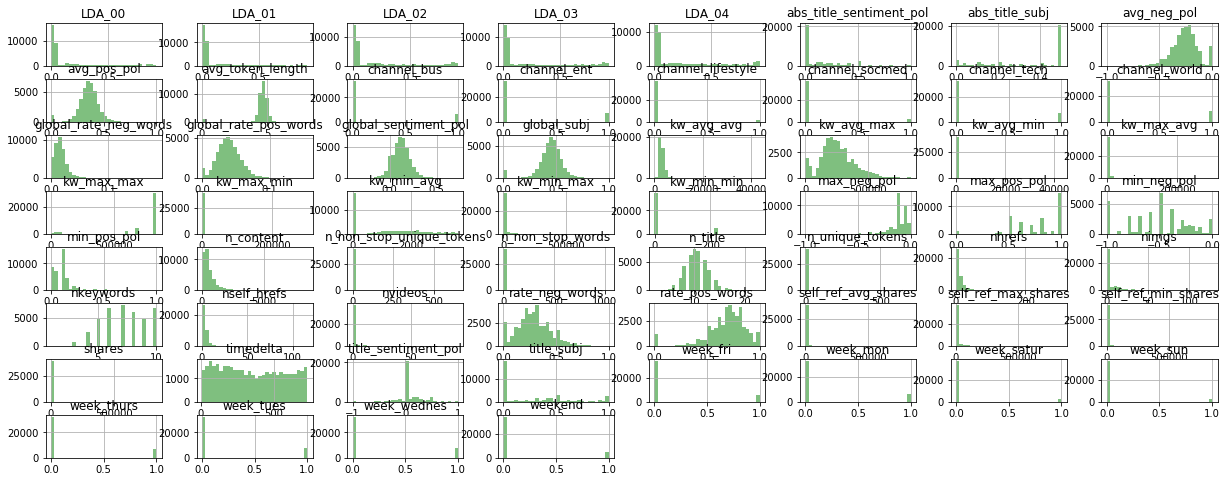

In [29]:
# viewing data histograms
df.hist(bins=30, figsize= (21, 8), facecolor="green", alpha=0.5)
plt.title(r"Histogram for Online News Shares")
plt.show();

> This dataset is an apparent composite of continuous, ordered - categorical, and discrete - binary features.
* This would sound alarms, for a linear regression task.
* Fortunately, for classification, this is not so much a problem.

## Building a Target

In [ ]:
# creating column (value = 1 for rows where `shares` is at least 1500)
df['Shares_plus'] = np.where(df['shares']>=1500, '1', '0').astype('int64')
df.Shares_plus.dtype

In [ ]:
# viewing the first 10 rows
df[['shares', 'Shares_plus']].head(10)

## Notebook Summary
> 39,644 rows with `url` index and 59 predictors for `shares`
* all numeric features
* shortened several feature names
* data to be divided into two classes of articles: 
    * 20082 shared < 1500 times and 19562 shared >= 1500 times
* built boolean target feature, `Shares_plus`, representing the two classes


## Save and Continue

In [ ]:
# saving the current - state dataframe to a pickle file
with open('data/df-os.pickle', 'wb') as f:
    # pickling the dataframe using the highest protocol available
    pickle.dump(df, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
# 72 Char. screen - width reference
########################################################################